In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import xarray as xr
import rioxarray as rxr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
# import xesmf as xe
import xclim.sdba as sdba

In [2]:
ds_tmax = xr.open_dataset("ssp5_hotdays.nc")
ds_tmax['lon'] = ds_tmax['lon'] - 360

In [3]:
# print(ds_tmax['lon']-360)
# print(ds_tmax['lat'])
# print(ds_tmax['scen'])
# print(ds_tmax)

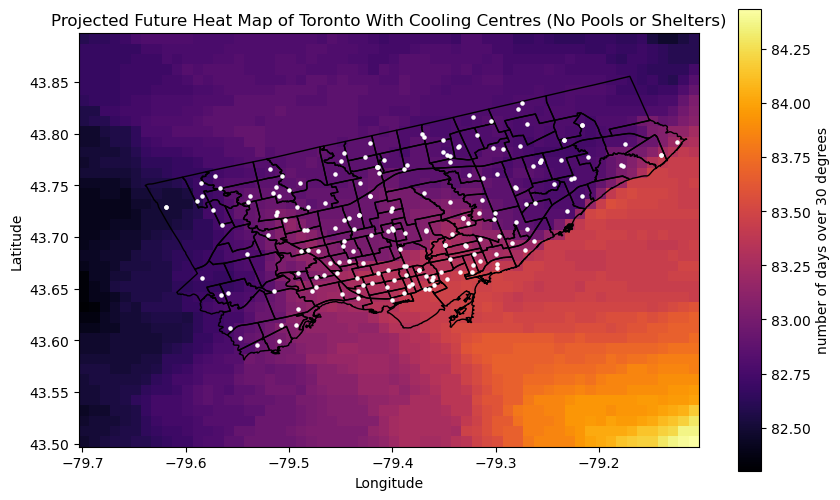

In [12]:
toronto_map = gpd.read_file('toronto_neighbourhood_shape.shp', crs="epsg:4326")

fig, ax = plt.subplots(figsize=(10, 6))
ds_tmax.scen.plot(x = 'lon', y = 'lat', cbar_kwargs = {'label' : 'number of days over 30 degrees'}, cmap = 'inferno')
toronto = toronto_map.plot(ax=ax, edgecolor='black', facecolor='none')

cooling_center_data_without_pools_shelters = pd.read_csv('cooling_centres_minus_pools_and_shelters.csv')

lons = []
lats = []
for i in range(len(cooling_center_data_without_pools_shelters['geometry'])):
    coords = np.array(cooling_center_data_without_pools_shelters['geometry'][i][40:][:-3].split(',')).astype(float)
    lons.append(coords[0])
    lats.append(coords[1])

ax.scatter(lons, lats, s = 5, color = 'white')

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Projected Future Heat Map of Toronto With Cooling Centres (No Pools or Shelters)')
plt.savefig('future-scenario.pdf')
plt.show()